In [10]:
import pandas as pd

In [15]:
# Load the dataset
df = pd.read_csv("Telecom_Customer_Churn.csv")

In [6]:
# Display the first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
# Check the data types and column names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Summary statistics of numerical columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [16]:
# Unique values in categorical columns
print(df['SeniorCitizen'].unique())

[0 1]


In [17]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
df = df.drop_duplicates()


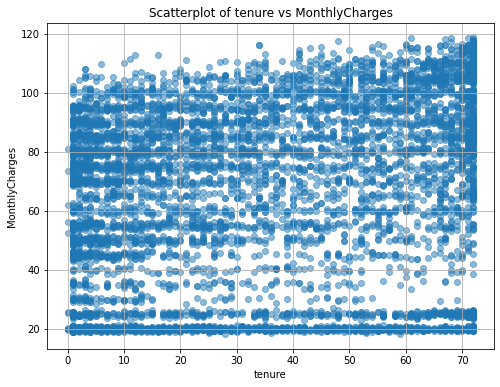

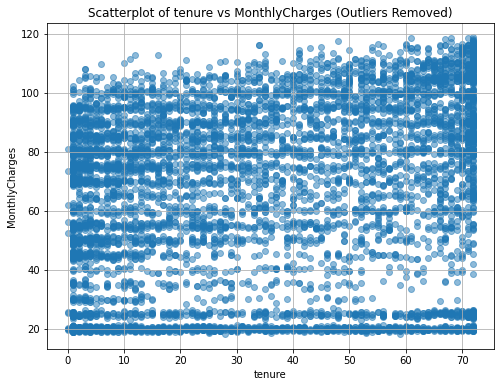

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Telecom_Customer_Churn.csv")

# Choose "tenure" and "MonthlyCharges" as feature1 and feature2
feature1 = 'tenure'
feature2 = 'MonthlyCharges'

# Create a scatterplot to visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], alpha=0.5)
plt.title(f'Scatterplot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)

# Identify and handle outliers
# Example of removing extreme outliers based on z-scores
z_threshold = 3  # You can adjust this threshold as needed
z_scores_feature1 = (df[feature1] - df[feature1].mean()) / df[feature1].std()
outliers = df[abs(z_scores_feature1) > z_threshold]
df = df[abs(z_scores_feature1) <= z_threshold]

# Show the updated scatterplot without extreme outliers
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], alpha=0.5)
plt.title(f'Scatterplot of {feature1} vs {feature2} (Outliers Removed)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)

# You can also apply other outlier handling methods as needed (e.g., Winsorizing, IQR)

plt.show()


In [28]:

from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv("Telecom_Customer_Churn.csv")

# Specify the features (X) and the target (y)
X = df.drop(columns=['Churn'])  # All columns except 'Churn' are features
y = df['Churn']  # 'Churn' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter controls the proportion of data to be used for testing. Here, 20% of the data is used for testing.
# The 'random_state' parameter ensures reproducibility by fixing the random seed for the split.

# Now, you have X_train, X_test, y_train, and y_test for your analysis.


In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
df = pd.read_csv("Telecom_Customer_Churn.csv")

# Specify the features to scale
features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Add other features as needed

# Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Standardization (Z-score scaling)
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


ValueError: could not convert string to float: ''